In [79]:
import numpy as np

In [160]:
class SVM:
    def __init__(self, X, y, C):
        self.n = X.shape[1]
        self.d = X.shape[0]
        ones_arr = np.array([np.ones(self.d)])
        self.X = np.concatenate((np.array(X), ones_arr.T), axis=1)
        self.y = y
        self.C = C
        self.W = np.random.rand(self.n+1)
        self.history = []
        
    def predict(self, X_pre):
        y_pre = self.W.T.dot(X)
        return y_pre

    
    def deviation(self):
        deviation = [] 
        for i in range(0, self.d):
            condition = 1 - self.y[i]*(np.array([self.W.dot(self.X[i])]))
            if condition >= 0:
                deviation.append(-self.y[i]*(self.X[i][:]) + (1/self.C)*self.W)
            else:
                deviation.append((1/self.C)*self.W)

        return np.sum(deviation, axis=0)
        
    def fit(self, momentum=0.9, lr=0.1, n_epochs=100):
        v = 0
        for i in range(0, n_epochs):
            v = v*momentum + lr*self.deviation()
            self.W = self.W - v

        return self.W
        
            
            

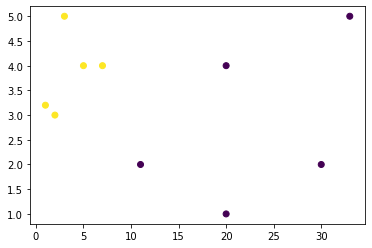

In [161]:
import matplotlib.pyplot as plt

X_train = np.array([[1, 3.2], [2, 3], [5,4], [7,4], [3, 5], [11, 2], [20,4], [33, 5], [30,2], [20, 1]])
y_train = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1])

plt.scatter(X_train.T[0], X_train.T[1], c=y_train)

In [293]:
svm = SVM(X_train, y_train, C=10)
w = svm.fit(momentum=0.5, lr=0.000001, n_epochs=3000)
w

array([0.09202944, 0.85236103, 0.16725378])

In [294]:
X_train[3]

array([7., 4.])

In [295]:
a_ = np.array([[1,1, 1], [35,5,1]])
y_ = a_.dot(w)
y_

array([1.11164425, 7.65008939])

In [296]:
margin = 1/(w[0]**2 + w[1]**2)**1/2
margin

0.6802825245560151

In [297]:
k = (margin**2 + (margin*10/34)**2)**1/2

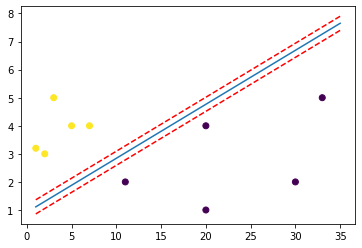

In [298]:
plt.scatter(X_train.T[0], X_train.T[1], c=y_train)
plt.plot(np.array([1, 35]), y_)
plt.plot(np.array([1, 35]), y_ - k, 'r--')
plt.plot(np.array([1, 35]), y_ + k, 'r--')